In [34]:
# Step one: Import the current version of the file (available for download at the link above), and isolate the columns of interest based on the variables you want to include


import pandas as pd

# I chose grass, degree, partyid and happy because I was interested in seeing if there was a relationship between them. 
columns = ['id', 'year', 'age', 'sex', 'grass', 'degree', 'partyid','happy']
df = pd.read_stata("GSS7218_R1.dta", columns=columns)

#Step two: determine the years applicable and narrow your dataset accordingly

# I wanted to look at 2010
df = df.loc[df['year'].isin({2010})]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex      grass          degree            partyid  \
53043     1  2010  31.0    male        NaN        bachelor   NOT STR DEMOCRAT   
53044     2  2010  23.0  female      legal        bachelor   NOT STR DEMOCRAT   
53045     3  2010  71.0  female        NaN  LT HIGH SCHOOL    STRONG DEMOCRAT   
53046     4  2010  82.0  female  NOT LEGAL  LT HIGH SCHOOL  STRONG REPUBLICAN   
53047     5  2010  78.0  female  NOT LEGAL  LT HIGH SCHOOL        independent   
...     ...   ...   ...     ...        ...             ...                ...   
55082  2040  2010  62.0    male        NaN        bachelor  STRONG REPUBLICAN   
55083  2041  2010  66.0  female  NOT LEGAL     HIGH SCHOOL  STRONG REPUBLICAN   
55084  2042  2010  54.0  female      legal     HIGH SCHOOL   NOT STR DEMOCRAT   
55085  2043  2010  57.0  female      legal        bachelor        independent   
55086  2044  2010  30.0    male      legal     HIGH SCHOOL        OTHER PARTY  

# Step three: Visualize at least two quantiative relationships or patterns

In [3]:
# limit dataset to exclude records from individuals who didn't answer this survey
df = df.loc[df['grass'].notna()]

#remove people with no value for happy
df = df.loc[df['happy'].notna()]
print(df.head)

<bound method NDFrame.head of          id  year   age     sex      grass          degree            partyid  \
53044     2  2010  23.0  female      legal        bachelor   NOT STR DEMOCRAT   
53046     4  2010  82.0  female  NOT LEGAL  LT HIGH SCHOOL  STRONG REPUBLICAN   
53047     5  2010  78.0  female  NOT LEGAL  LT HIGH SCHOOL        independent   
53048     6  2010  40.0    male      legal  LT HIGH SCHOOL    STRONG DEMOCRAT   
53051     9  2010  31.0  female  NOT LEGAL     HIGH SCHOOL    STRONG DEMOCRAT   
...     ...   ...   ...     ...        ...             ...                ...   
55081  2039  2010  63.0    male  NOT LEGAL     HIGH SCHOOL       IND,NEAR REP   
55083  2041  2010  66.0  female  NOT LEGAL     HIGH SCHOOL  STRONG REPUBLICAN   
55084  2042  2010  54.0  female      legal     HIGH SCHOOL   NOT STR DEMOCRAT   
55085  2043  2010  57.0  female      legal        bachelor        independent   
55086  2044  2010  30.0    male      legal     HIGH SCHOOL        OTHER PARTY  

47.962519936204146


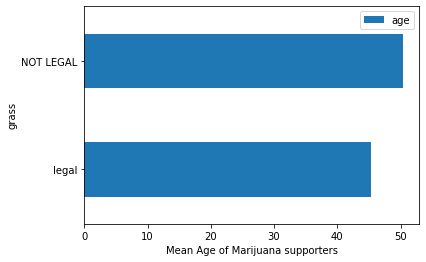

In [5]:
df = df.replace('89 OR OLDER', 89)
df['age'] = pd.to_numeric(df['age'])
print(df['age'].mean())

import matplotlib.pyplot as plt
df.groupby('grass')['age'].mean().plot(kind='barh')
plt.xlabel('Mean Age of Marijuana supporters')
plt.legend();

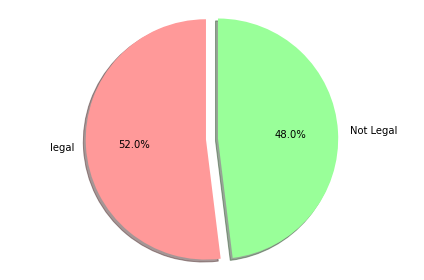

In [8]:
grass_counts = df['grass'].value_counts()
labels=["legal","Not Legal"]
colors=["#ff9999","#99ff99"]
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(grass_counts, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  
plt.tight_layout()
plt.show()


In [9]:
exhibition_gender = df.groupby('grass')['sex'].value_counts()
exhibition_gender

grass            
legal      female    308
           male      295
NOT LEGAL  female    400
           male      252
Name: sex, dtype: int64

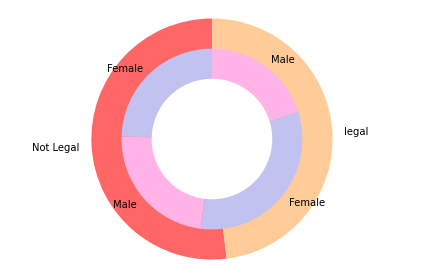

In [10]:

import matplotlib.pyplot as plt
 
# Data to plot
labels = ['Not Legal','legal']
exhibition_counts = df['grass'].value_counts()
labels_gender = ['Female','Male','Female','Male']
colors = ['#ff6666', '#ffcc99', '#99ff99', '#66b3ff']
colors_gender = ['#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6']
 
# Plot
plt.pie(exhibition_counts, labels=labels, colors=colors, startangle=90,frame=True)
plt.pie(exhibition_gender, labels=labels_gender, colors=colors_gender,radius=0.75,startangle=90)
centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
 
plt.axis('equal')
plt.tight_layout()
plt.show()

# Step four: Group the data using at least two different divisions

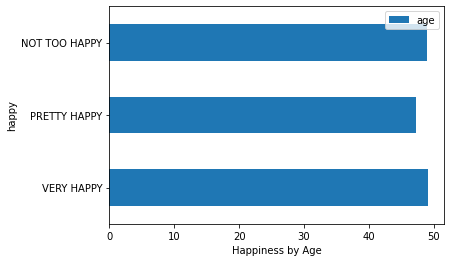

In [16]:
#Strugled here a bit cause I couldnt really get what I wanted grouped. I think it has to do with the fact that I didnt have many numerical values.

df['age'] = df['age'].replace(['No', 'Yes'], [0, 1])
df['happy'] = df['happy'].replace(['No', 'Yes'], [0, 1])
df.head()

df.groupby('happy')['age'].mean().plot(kind='barh')
plt.xlabel('Happiness by Age')
plt.legend();

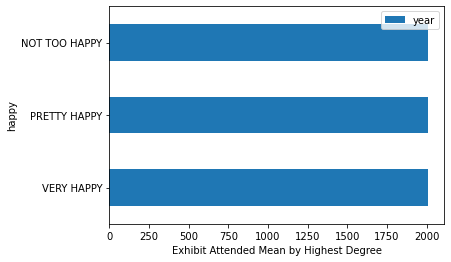

In [26]:

df.groupby('happy')['year'].mean().plot(kind='barh')
plt.xlabel('Exhibit Attended Mean by Highest Degree')
plt.legend();